# Crop Recommendation

### Dataset- https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import time
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [45]:
# Load the dataset
directory = '../dataset/fertilizer.csv'
df = pd.read_csv(directory)

In [46]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


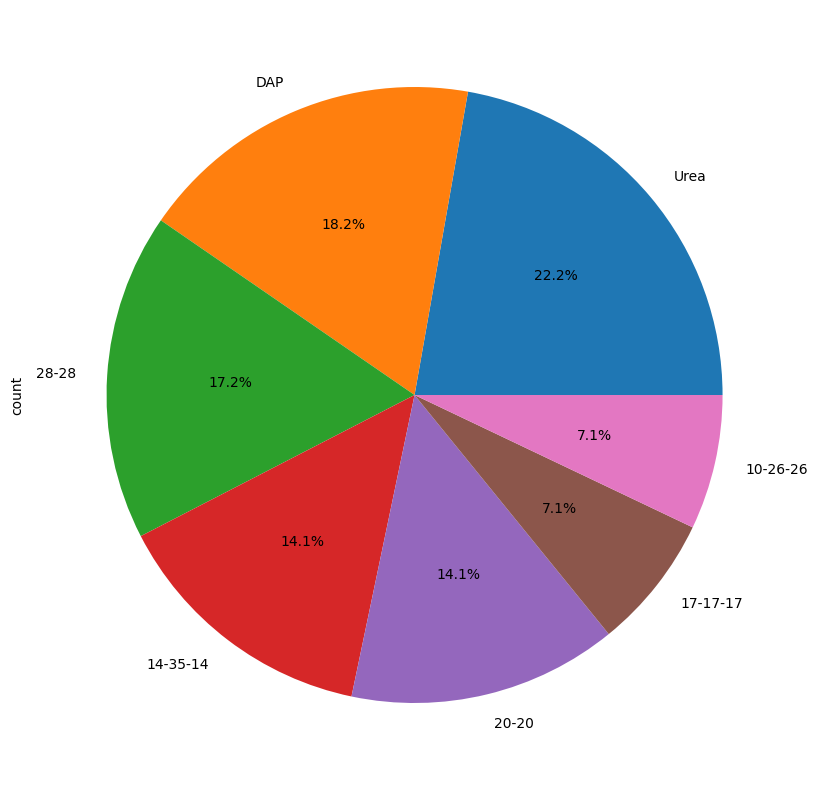

In [47]:
plt.figure(figsize=(10,10))
df['Fertilizer Name'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()

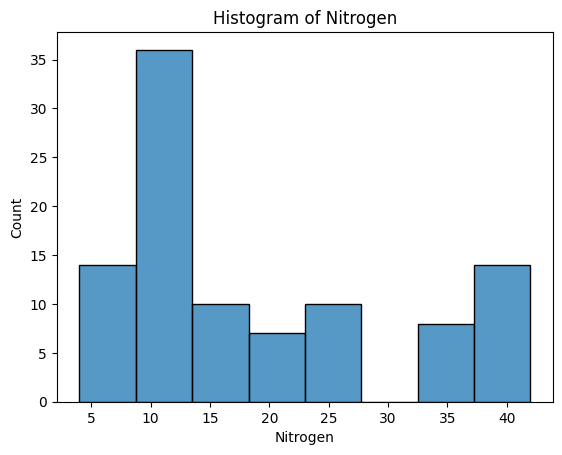

In [48]:
sns.histplot(df['Nitrogen'])
plt.title('Histogram of Nitrogen')
plt.show()

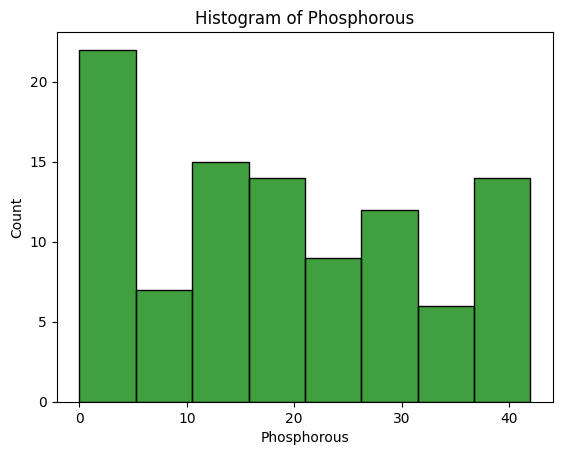

In [49]:
sns.histplot(df['Phosphorous'],color='Green')
plt.title('Histogram of Phosphorous')
plt.show()

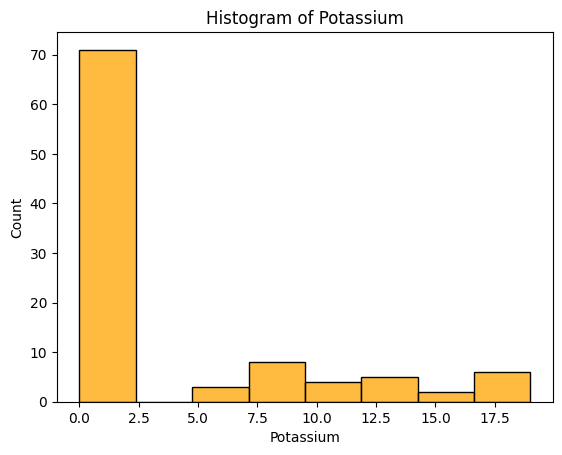

In [50]:
sns.histplot(df['Potassium'],color='Orange')
plt.title('Histogram of Potassium')
plt.show()

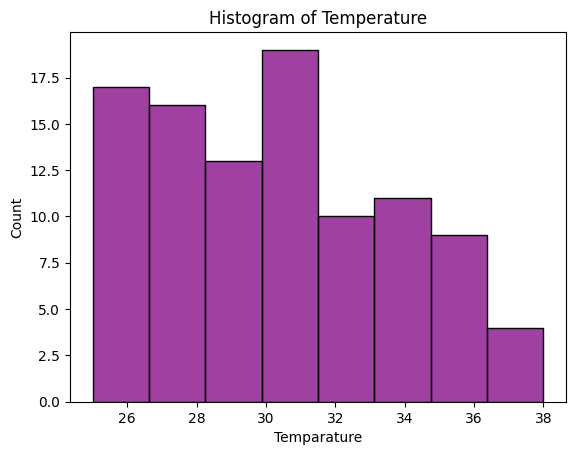

In [51]:
sns.histplot(df['Temparature'],color='Purple')
plt.title('Histogram of Temperature')
plt.show()

In [52]:
# Define the label mapping dictionary

crop_labels = {
'Maize' : 0,
'Sugarcane': 1,
'Cotton': 2,
'Tobacco': 3,
'Paddy': 4,
'Barley': 5,
'Wheat': 6,
'Millets': 7,
'Oil seeds': 8,
'Pulses': 9,
'Ground Nuts': 10
}

fertilizers_labels = {
'Urea': 0,
'DAP': 1,
'14-35-14': 2,
'28-28': 3,
'17-17-17': 4,
'20-20': 5,
'10-26-26': 6
}

# Map the label column using the dictionary
df['Crop Type'] = df['Crop Type'].map(crop_labels)
df['Fertilizer Name'] = df['Fertilizer Name'].map(fertilizers_labels)

In [53]:
df = df.drop('Soil Type',axis=1)

In [54]:
df.head()

,Temparature,Humidity,Moisture,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,0,37,0,0,0
1,29,52,45,1,12,0,36,1
2,34,65,62,2,7,9,30,2
3,32,62,34,3,22,0,20,3
4,28,54,46,4,35,0,0,0


In [55]:
x = df.drop('Fertilizer Name',axis=1)
y = df['Fertilizer Name']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

## Algorithms

In [57]:
# Random Forest
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Example parameters
rf_model.fit(X_train, y_train)
train_time_rf = time.time() - start_time

In [58]:
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

f1_rf = f1_score(y_test, y_pred_test_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_test_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_test_rf, average='weighted')

print("Random Forest:")
print(f"Training Accuracy: {train_accuracy_rf}")
print(f"Testing Accuracy: {test_accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Recall: {recall_rf}")
print(f"Precision: {precision_rf}")
print(f"Training Time: {train_time_rf}\n")

Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Training Time: 0.07503390312194824



In [59]:
# Support Vector Machine
start_time = time.time()
svm_model = SVC()
svm_model.fit(X_train, y_train)
train_time_svm = time.time() - start_time

In [60]:
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

f1_svm = f1_score(y_test, y_pred_test_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_test_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_test_svm, average='weighted')

print("Support Vector Machine:")
print(f"Training Accuracy: {train_accuracy_svm}")
print(f"Testing Accuracy: {test_accuracy_svm}")
print(f"F1 Score: {f1_svm}")
print(f"Recall: {recall_svm}")
print(f"Precision: {precision_svm}")
print(f"Training Time: {train_time_svm}\n")

Support Vector Machine:
Training Accuracy: 0.8607594936708861
Testing Accuracy: 0.9
F1 Score: 0.875
Recall: 0.9
Precision: 0.8666666666666668
Training Time: 0.0013165473937988281



In [61]:
# Multinomial Naive Bayes
start_time = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
train_time_nb = time.time() - start_time

In [62]:
y_pred_train_nb = nb_model.predict(X_train)
y_pred_test_nb = nb_model.predict(X_test)

train_accuracy_nb = accuracy_score(y_train, y_pred_train_nb)
test_accuracy_nb = accuracy_score(y_test, y_pred_test_nb)

f1_nb = f1_score(y_test, y_pred_test_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_test_nb, average='weighted')
precision_nb = precision_score(y_test, y_pred_test_nb, average='weighted')

print("Multinomial Naive Bayes:")
print(f"Training Accuracy: {train_accuracy_nb}")
print(f"Testing Accuracy: {test_accuracy_nb}")
print(f"F1 Score: {f1_nb}")
print(f"Recall: {recall_nb}")
print(f"Precision: {precision_nb}")
print(f"Training Time: {train_time_nb}\n")

Multinomial Naive Bayes:
Training Accuracy: 0.9620253164556962
Testing Accuracy: 0.95
F1 Score: 0.9272727272727274
Recall: 0.95
Precision: 0.9083333333333334
Training Time: 0.0019998550415039062



In [63]:
from joblib import dump, load

# Save the Multinomial Naive Bayes model
dump(rf_model, '../models/fertilizer.joblib')

['../models/fertilizer.joblib']

In [64]:
df.head()

,Temparature,Humidity,Moisture,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,0,37,0,0,0
1,29,52,45,1,12,0,36,1
2,34,65,62,2,7,9,30,2
3,32,62,34,3,22,0,20,3
4,28,54,46,4,35,0,0,0


In [65]:
# Load the saved Multinomial Naive Bayes model
from joblib import load

loaded_model = load('../models/fertilizer.joblib')

crop_labels = {
'Maize' : 0,
'Sugarcane': 1,
'Cotton': 2,
'Tobacco': 3,
'Paddy': 4,
'Barley': 5,
'Wheat': 6,
'Millets': 7,
'Oil seeds': 8,
'Pulses': 9,
'Ground Nuts': 10
}

fertilizers_labels = ['Urea','DAP','14-35-14','28-28','17-17-17', '20-20','10-26-26']

Temperature = 28
Humidity = 54
Moisture = 41
Crop = 'Paddy'
Nitrogen = 36
Potasium = 0
Phosphorous = 0

Crop_Type = crop_labels[Crop]

print(Crop_Type)

def recommend_fertilizer(Temperature, Humidity, Moisture, Crop_Type, Nitrogen, Potasium, Phosphorous):
    
    prediction = loaded_model.predict([[Temperature, Humidity, Moisture, Crop_Type, Nitrogen, Potasium, Phosphorous]])
    return prediction[0]

# Get the recommended crop
recommended_fertilizer = recommend_fertilizer(Temperature, Humidity, Moisture, Crop_Type, Nitrogen, Potasium, Phosphorous)
print("Recommended Fertilizer:", fertilizers_labels[recommended_fertilizer])

4
Recommended Fertilizer: Urea
